# Fluxo   
   
1. Baixa as notícias
2. Transforma os textos em um DataFrame de Pandas
3. Cria vetores de embedding no modelo do Spacy
4. Agrupa as notícias por uma similaridade semântica
5. Mostra para grupo, as categorias das notícias
6. Faz uma visualização de 2D das noticías (redução dimensionalidade)
7. Mostra para grupo uma nuvem de palavras

In [1]:
!kaggle datasets download --force -d pariza/bbc-news-summary

Dataset URL: https://www.kaggle.com/datasets/pariza/bbc-news-summary
License(s): CC0-1.0




  0%|          | 0.00/8.91M [00:00<?, ?B/s]
100%|██████████| 8.91M/8.91M [00:00<00:00, 1.08GB/s]


In [2]:
import zipfile
import pandas as pd
import os
from io import TextIOWrapper


zip_path = "bbc-news-summary.zip"


data = []
with zipfile.ZipFile(zip_path, "r") as fzip:
    for file in fzip.namelist():
        if not file.startswith("bbc news summary/BBC News Summary/News Articles/"):
            continue
        if file.endswith(".txt"):
            parts = file.split("/")
            category = parts[-2]
            with fzip.open(file) as f:
                content = TextIOWrapper(f, encoding='latin1').read().strip()
                data.append({'text': content, 'category': category})

df = pd.DataFrame(data)
df.head()


,text,category
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [3]:
df.category.value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [4]:
!python -m spacy download en_core_web_md

     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     --- ------------------------------------ 2.6/33.5 MB 15.1 MB/s eta 0:00:03
     --------- ------------------------------ 7.9/33.5 MB 20.3 MB/s eta 0:00:02
     ------------ -------------------------- 10.5/33.5 MB 19.9 MB/s eta 0:00:02
     ------------------ -------------------- 16.3/33.5 MB 19.7 MB/s eta 0:00:01
     ------------------------ -------------- 21.0/33.5 MB 21.0 MB/s eta 0:00:01
     ----------------------------- --------- 25.7/33.5 MB 20.9 MB/s eta 0:00:01
     ------------------------------------ -- 31.5/33.5 MB 22.2 MB/s eta 0:00:01
     --------------------------------------- 33.5/33.5 MB 20.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [5]:
import spacy
import numpy as np

from tqdm.auto import tqdm
tqdm.pandas()

nlp = spacy.load("en_core_web_md")



c:\Users\belch\anaconda3\envs\llm311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
stopwords = nlp.Defaults.stop_words
custom_stopwords = stopwords.union({'mr', 'ms', 'i'})

In [18]:

df['doc'] = df.text.progress_apply(lambda text: nlp(text.lower()))

100%|██████████| 2225/2225 [02:20<00:00, 15.81it/s]


In [22]:
df['doc'][0]

ad sales boost time warner profit

quarterly profits at us media giant timewarner jumped 76% to $1.13bn (â£600m) for the three months to december, from $639m year-earlier.

the firm, which is now one of the biggest investors in google, benefited from sales of high-speed internet connections and higher advert sales. timewarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. its profits were buoyed by one-off gains which offset a profit dip at warner bros, and less users for aol.

time warner said on friday that it now owns 8% of search-engine google. but its own internet business, aol, had has mixed fortunes. it lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. however, the company said aol's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sign up ao

In [20]:
df['lemma'] = df.doc.progress_apply(lambda doc: [
    token.lemma_ for token in doc if (len(token) > 2) and token.is_alpha and (token.lemma_ not in custom_stopwords)])


100%|██████████| 2225/2225 [00:00<00:00, 3896.49it/s]


In [24]:
df['lemma'][0]

['sale',
 'boost',
 'time',
 'warner',
 'profit',
 'quarterly',
 'profit',
 'media',
 'giant',
 'timewarner',
 'jump',
 'month',
 'december',
 'year',
 'early',
 'firm',
 'big',
 'investor',
 'google',
 'benefit',
 'sale',
 'high',
 'speed',
 'internet',
 'connection',
 'high',
 'advert',
 'sale',
 'timewarner',
 'fourth',
 'quarter',
 'sale',
 'rise',
 'profit',
 'buoy',
 'gain',
 'offset',
 'profit',
 'dip',
 'warner',
 'bros',
 'user',
 'aol',
 'time',
 'warner',
 'friday',
 'search',
 'engine',
 'google',
 'internet',
 'business',
 'aol',
 'mix',
 'fortune',
 'lose',
 'subscriber',
 'fourth',
 'quarter',
 'profit',
 'low',
 'precede',
 'quarter',
 'company',
 'aol',
 'underlie',
 'profit',
 'exceptional',
 'item',
 'rise',
 'strong',
 'internet',
 'advertising',
 'revenue',
 'hope',
 'increase',
 'subscriber',
 'offer',
 'online',
 'service',
 'free',
 'timewarner',
 'internet',
 'customer',
 'try',
 'sign',
 'aol',
 'exist',
 'customer',
 'high',
 'speed',
 'broadband',
 'timewarn

In [9]:
df['vectors'] = df.doc.progress_apply(lambda doc: np.array(doc.vector))

100%|██████████| 2225/2225 [00:03<00:00, 580.43it/s]


In [25]:
df

,text,category,doc,lemma,vectors,cluster,tsne_x,tsne_y
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,"(ad, sales, boost, time, warner, profit, \n\n,...","[sale, boost, time, warner, profit, quarterly,...","[-0.7193304, 0.30883816, -0.039744046, -0.0432...",3,53.181660,-1.769695
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,"(dollar, gains, on, greenspan, speech, \n\n, t...","[dollar, gain, greenspan, speech, dollar, hit,...","[-0.70262104, 0.23647642, -0.08732762, -0.0123...",3,58.643791,-18.652655
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,"(yukos, unit, buyer, faces, loan, claim, \n\n,...","[yukos, unit, buyer, face, loan, claim, owner,...","[-0.6459558, 0.20119494, -0.12081968, -0.03655...",0,30.497833,-25.116501
3,High fuel prices hit BA's profits\n\nBritish A...,business,"(high, fuel, prices, hit, ba, 's, profits, \n\...","[high, fuel, price, hit, profit, british, airw...","[-0.6972988, 0.2964666, -0.014015451, -0.03825...",3,54.303028,-0.865429
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,"(pernod, takeover, talk, lifts, domecq, \n\n, ...","[pernod, takeover, talk, lift, domecq, share, ...","[-0.676196, 0.1873766, -0.010159899, -0.052733...",0,43.669281,1.839876
...,...,...,...,...,...,...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech,"(bt, program, to, beat, dialler, scams, \n\n, ...","[program, beat, dialler, scam, introduce, init...","[-0.7109693, 0.2081351, -0.1625676, -0.0585224...",1,14.507339,24.863420
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech,"(spam, e, -, mails, tempt, net, shoppers, \n\n...","[spam, mail, tempt, net, shopper, computer, us...","[-0.73549604, 0.22394745, -0.15800534, -0.0696...",1,6.565875,51.398560
2222,Be careful how you code\n\nA new European dire...,tech,"(be, careful, how, you, code, \n\n, a, new, eu...","[careful, code, new, european, directive, soft...","[-0.7095644, 0.19630948, -0.16856484, -0.07718...",8,-5.182228,34.055370
2223,US cyber security chief resigns\n\nThe man mak...,tech,"(us, cyber, security, chief, resigns, \n\n, th...","[cyber, security, chief, resign, man, sure, co...","[-0.7274873, 0.18809457, -0.118178, -0.0372324...",5,9.583259,15.747232


### Agrupando por similaridade usando clusterizacao

In [30]:
from sklearn.cluster import AgglomerativeClustering
vectors = np.stack(df.vectors.values)
cluster_model = AgglomerativeClustering(n_clusters=10)
df['cluster'] = cluster_model.fit_predict(vectors)
category_by_cluster = pd.crosstab(df.cluster, df.category)
category_by_cluster

category,business,entertainment,politics,sport,tech
cluster,,,,,
0,219,6,112,2,25
1,19,14,23,1,310
2,1,69,60,230,7
3,250,0,2,0,3
4,0,161,1,2,0
5,13,34,132,53,4
6,0,2,0,28,0
7,2,4,0,173,0
8,1,20,82,14,39


### Reducao de dimensionalidade para 2 

In [31]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, init='pca')
tsne_result = tsne.fit_transform(vectors)

In [32]:
df["tsne_x"], df["tsne_y"] = tsne_result[:, 0], tsne_result[:, 1]

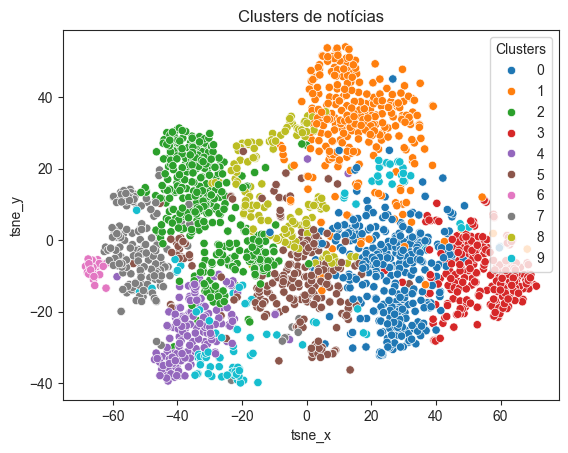

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")

sns.scatterplot(
    x="tsne_x",
    y="tsne_y",
    hue="cluster",
    palette='tab10',
    data=df)

plt.xlabel('tsne_x')
plt.ylabel('tsne_y')
plt.title('Clusters de notícias')
plt.legend(title="Clusters")


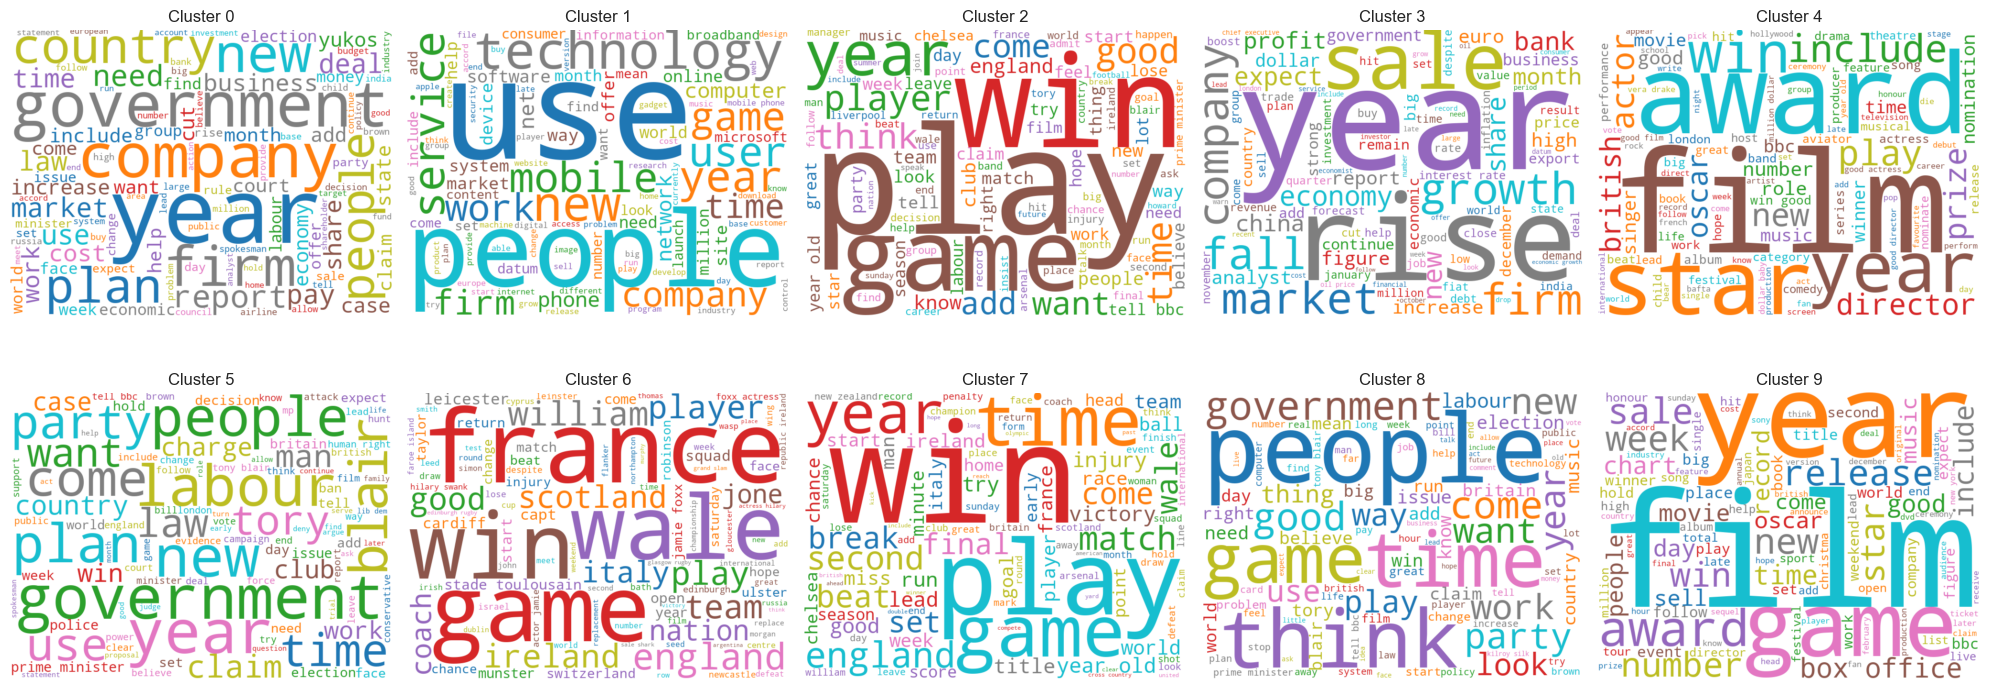

In [34]:
from wordcloud import WordCloud

fig, axes = plt.subplots(2, 5, figsize=(20, 8))


for cluster_id in sorted(df.cluster.unique()):
    texts = []
    cluster_df = df[df.cluster == cluster_id]
    for text in cluster_df.lemma.tolist():
        texts.extend(text)
    text = " ".join(texts)
    wordcloud = WordCloud(width=800, height=600,
                          background_color="white",
                          colormap="tab10", max_words=100).generate(text)
    ax = axes.flatten()[cluster_id]
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(f"Cluster {cluster_id}")
    ax.axis("off")
fig.tight_layout()

In [35]:
category_by_cluster

category,business,entertainment,politics,sport,tech
cluster,,,,,
0,219,6,112,2,25
1,19,14,23,1,310
2,1,69,60,230,7
3,250,0,2,0,3
4,0,161,1,2,0
5,13,34,132,53,4
6,0,2,0,28,0
7,2,4,0,173,0
8,1,20,82,14,39
